In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

C:\Users\jinwo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history=model.fit(train_images, train_labels, epochs=5, validation_data= (test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 26ms/step - accuracy: 0.8919 - loss: 0.3386 - val_accuracy: 0.9847 - val_loss: 0.0522
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 25ms/step - accuracy: 0.9846 - loss: 0.0512 - val_accuracy: 0.9882 - val_loss: 0.0384
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9888 - loss: 0.0342 - val_accuracy: 0.9832 - val_loss: 0.0528
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.9925 - loss: 0.0241 - val_accuracy: 0.9914 - val_loss: 0.0294
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9932 - loss: 0.0189 - val_accuracy: 0.9911 - val_loss: 0.0325


In [11]:
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score


In [15]:
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# 예측 수행
pred_probs = model.predict(test_images)
pred_labels = np.argmax(pred_probs, axis=1)

# Confusion Matrix 및 지표 계산
conf_matrix = confusion_matrix(test_labels, pred_labels)
f1 = f1_score(test_labels, pred_labels, average='weighted')
precision = precision_score(test_labels, pred_labels, average='weighted')
recall = recall_score(test_labels, pred_labels, average='weighted')

# Specificity per class
specificity = []
for i in range(conf_matrix.shape[0]):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
    specificity.append(tn / (tn + fp) if (tn + fp) > 0 else 0)

# 출력
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Mean Specificity: {np.mean(specificity):.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Confusion Matrix:
[[ 977    1    0    0    0    0    0    1    1    0]
 [   0 1127    0    1    1    0    5    1    0    0]
 [   1    0 1024    1    1    0    0    5    0    0]
 [   0    1    2 1003    0    1    0    2    1    0]
 [   0    0    0    0  978    0    0    0    0    4]
 [   1    0    0   10    0  876    1    1    1    2]
 [   3    1    0    0    3    0  951    0    0    0]
 [   0    5    3    0    1    0    0 1016    1    2]
 [   4    0    2    0    2    1    0    2  956    7]
 [   0    0    0    0    4    1    0    1    0 1003]]
F1 Score: 0.9911
Precision: 0.9911
Recall: 0.9911
Mean Specificity: 0.9990


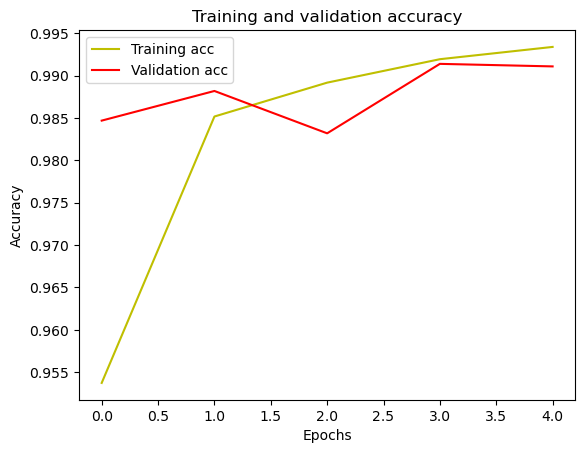

In [21]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(acc, 'y', label='Training acc')
plt.plot(val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()